# Andry Ramorasata

## Research questions/interests

If there is a significant correlation between a demographic factor and a crime? Disorder and a crime?
What are the statistics of somebody to commit a specific crime based off certain demographic characterisics?

Revamped questions, October 31, 2021.  
Order of questions:  
Relation between one of the top ten disorders and number of sentences?
Disorder and most common type of crime?  
If I am given a certain disorder, could I predict the probability of the type of crimes based on certain factors?
If I am given a crime, can I figure out the probability of certain demographic characteristics?
Can disorder play a role with demographic characteristics?

Final question(s):   
Once finding a mental disorder of interest, can we determine typical demographic characteristics for the type of mental disorder?

# Milestone 3

### Task 1:

#### Exploratory Data Analysis

In [7]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read data
Data1 = pd.read_csv("../data/processed/rec1data.csv")

# Data content
Data1.info() 
Data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1003 non-null   int64
 1   id          1003 non-null   int64
 2   rid         1003 non-null   int64
 3   sex         1003 non-null   int64
 4   birth       1003 non-null   int64
 5   race        1003 non-null   int64
 6   educ        1003 non-null   int64
 7   marital     1003 non-null   int64
 8   children    1003 non-null   int64
 9   occupat     1003 non-null   int64
 10  arrests     1003 non-null   int64
 11  jail        1003 non-null   int64
 12  crime01     1003 non-null   int64
 13  crime02     1003 non-null   int64
 14  crime03     1003 non-null   int64
 15  crime04     1003 non-null   int64
 16  crime05     1003 non-null   int64
 17  crime06     1003 non-null   int64
 18  crime07     1003 non-null   int64
 19  crime08     1003 non-null   int64
 20  crime09     1003 non-null   in

,Unnamed: 0,id,rid,sex,birth,race,educ,marital,children,occupat,...,crime05,crime06,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,0
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Visualize the data better 
pd.set_option('display.max_rows', rec1data.shape[0]+1) # Command blocks adapted by Andryw Marques (https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf)
pd.set_option('display.max_columns', None)
# Insert here 'Data1' for full table.

NameError: name 'rec1data' is not defined

In [4]:
# Set back to default
pd.reset_option('^display.', silent=True)
Data1

,Unnamed: 0,id,rid,sex,birth,race,educ,marital,children,occupat,...,crime05,crime06,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,0
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,999,991,1,21,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
999,1000,1000,991,1,48,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,1001,1001,991,1,46,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,1002,1002,991,1,42,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Even though all the following data points/values are integers, most are technically categorical,
# so lets change the following:
Data1 = Data1.astype({'id': 'object', 
                      'sex': 'category',
                      'race': 'category',
                     'marital': 'category',
                      'occupat': 'category',
                     'crime01': 'category',
                     'crime02':'category',
                     'crime03': 'category',
                     'crime04': 'category',
                     'crime05': 'category',
                     'crime06': 'category',
                     'crime07': 'category',
                     'crime08': 'category',
                     'crime09': 'category',
                     'crime10':'category',
                     'crime11': 'category',
                     'crime12':'category',
                     'crime13':'category',
                     'crime14':'category'})
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  617 non-null    int64   
 1   id          617 non-null    object  
 2   rid         617 non-null    int64   
 3   sex         617 non-null    category
 4   birth       617 non-null    int64   
 5   race        617 non-null    category
 6   educ        617 non-null    int64   
 7   marital     617 non-null    category
 8   children    617 non-null    int64   
 9   occupat     617 non-null    category
 10  arrests     617 non-null    int64   
 11  jail        617 non-null    int64   
 12  crime01     617 non-null    category
 13  crime02     617 non-null    category
 14  crime03     617 non-null    category
 15  crime04     617 non-null    category
 16  crime05     617 non-null    category
 17  crime06     617 non-null    category
 18  crime07     617 non-null    category
 19  crime08 

In [6]:
# Now, let's have a general idea of how many sentences people received by creating another column.
Data1['sentences'] = (Data1.iloc[:,12:25] != 0).sum(axis=1)
Data1['sentences'].describe()

# Seeing that we have a minimum of 0, seems like some people weren't convicted. 

count    1003.000000
mean        0.816550
std         1.115239
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        13.000000
Name: sentences, dtype: float64

In [7]:
# What I want to see now is how many people weren't sentenced.
Sentenced = [0]
ZS = Data1[Data1["crime01"].isin(Sentenced)]
ZS
# That's quite a few people without any sentences. Perhaps there is an error in the data and some may have crimes..?
# Let's see if these people were arrested or jailed.
A = ZS.arrests.sum()
J = ZS.jail.sum()
print(A)
print(J)

0
0


In [8]:
# The codebook doesn't seem to explain the missing information, so perhaps we will just remove all the individuals
# with a total sentence of 0.
Data1 = Data1[Data1.sentences != 0]
Data1.info()
Data1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  617 non-null    int64   
 1   id          617 non-null    object  
 2   rid         617 non-null    int64   
 3   sex         617 non-null    category
 4   birth       617 non-null    int64   
 5   race        617 non-null    category
 6   educ        617 non-null    int64   
 7   marital     617 non-null    category
 8   children    617 non-null    int64   
 9   occupat     617 non-null    category
 10  arrests     617 non-null    int64   
 11  jail        617 non-null    int64   
 12  crime01     617 non-null    category
 13  crime02     617 non-null    category
 14  crime03     617 non-null    category
 15  crime04     617 non-null    category
 16  crime05     617 non-null    category
 17  crime06     617 non-null    category
 18  crime07     617 non-null    category
 19  crime08 

,Unnamed: 0,id,rid,sex,birth,race,educ,marital,children,occupat,...,crime06,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14,sentences
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,1
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,1
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,1
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# Now we are down to 616 entries out of 1003 we originally had.
# Let's clean up the data just a little bit more. 
df1 = Data1.drop(labels = ["Unnamed: 0", "arrests", "jail","rid"], axis=1)
df1.sentences.describe()

count    617.000000
mean       1.327391
std        1.159284
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       13.000000
Name: sentences, dtype: float64

array([[<AxesSubplot:title={'center':'sentences'}>]], dtype=object)

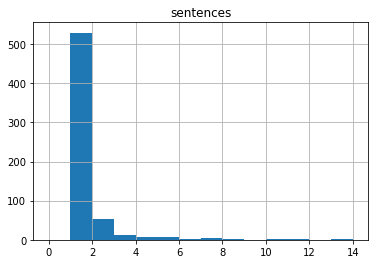

In [10]:
# Solid, lets see this visually
df1.hist(column = "sentences", bins = range(15))
# Data here is positively skewed. 

<AxesSubplot:>

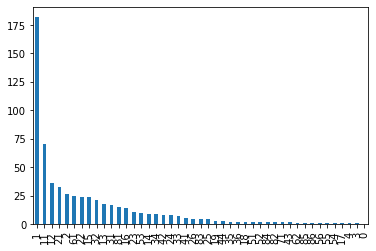

In [11]:
# Let's answer the question, for the first sentence, what is the most frequent crime?
x = 10
df1['crime01'].value_counts()[:x].index.tolist()
df1['crime01'].value_counts().plot(kind='bar')
# Okay, so it's public intoxication, larcency(11-12), assault, possession of drugs, Youthful Offender, 
# possession of dangerous weapons, trespass, DUI, possession of stolen property.

In [12]:
# Psych Data analysis - import and visualization
pdata = pd.read_csv("../data/processed/psychdata.csv")
pdata.info()
pdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4548 non-null   int64 
 1   id            4548 non-null   int64 
 2   contact       4548 non-null   int64 
 3   date_contact  4548 non-null   int64 
 4   facility      4548 non-null   int64 
 5   address       4548 non-null   object
 6   diagnosis     4548 non-null   object
 7   service       4548 non-null   int64 
 8   date_term     4548 non-null   int64 
 9   reason_term   4548 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 355.4+ KB


,Unnamed: 0,id,contact,date_contact,facility,address,diagnosis,service,date_term,reason_term
0,1,1,1,600804,1,100,103,0,600808,0
1,2,1,2,600809,2,100,715,1,601130,9
2,3,1,3,640320,1,100,715,0,640401,0
3,4,1,4,640910,2,100,715,0,641027,9
4,5,1,5,641109,1,100,103,0,641113,0


In [13]:
# Let's see the most common diagnosis
n = 10
pdata['diagnosis'].value_counts()[:n].index.tolist()

['755', '238', '758', '103', '715', '444', '617', '901', '436', '265']

<AxesSubplot:>

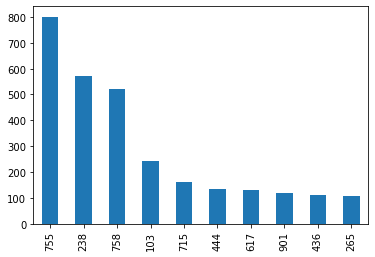

In [14]:
# Visualize this data
DIA = ['755', '238', '758', '103', '715', '444', '617', '901', '436', '265']
DIAS = pdata[pdata["diagnosis"].isin(DIA)]
DIAS['diagnosis'].value_counts().plot(kind='bar')

In [15]:
# Let's do some clean up of the psychiatric data. I only want data with the diagnosis.
psych_data = pdata.drop(labels=["Unnamed: 0", "contact", "date_contact", "facility", "address", "service", "date_term", "reason_term"], axis=1)
psych_data

,id,diagnosis
0,1,103
1,1,715
2,1,715
3,1,715
4,1,103
...,...,...
4543,1000,802
4544,1001,738
4545,1002,802
4546,1003,437


In [16]:
# Let's merge the two dataframes now.
rpdata = pd.merge(df1, psych_data, how='inner', on='id')
rpdata
# Theres seems to be duplicates. Must be what the author meant by possible matches for 
# psychiatric treatment and demographic characteristics.

,id,sex,birth,race,educ,marital,children,occupat,crime01,crime02,...,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14,sentences,diagnosis
0,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,103
1,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
2,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
3,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
4,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,382,1,52,1,13,1,0,0,61,0,...,0,0,0,0,0,0,0,0,1,802
3244,383,1,49,1,7,1,0,0,11,0,...,0,0,0,0,0,0,0,0,1,309
3245,384,1,48,2,11,1,0,20,12,0,...,0,0,0,0,0,0,0,0,1,617
3246,385,1,27,2,9,2,2,0,32,1,...,0,0,0,0,0,0,0,0,2,753


### Task 2-3:

#### Analysis Pipeline:

##### 1. Load Data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Loading Data
Data1 = pd.read_csv("../data/processed/rec1data.csv")
pdata = pd.read_csv("../data/processed/psychdata.csv")

##### 2. Clean Data

In [ ]:
# Cleaning up Data1
DataFrame1 = Data1.drop("Unnamed: 0", axis=1)
df1 = DataFrame1.drop(columns=['arrests', 'jail','rid'])


# Cleaning up PsychData
psych_data = pdata.drop(labels=["Unnamed: 0", "contact", "date_contact", "facility", 
                                "address", "service", "date_term", "reason_term"], axis=1)
psych_data

##### 3. Process Data

In [ ]:
# Creating variables
df1['sentences'] = (df1.iloc[:,8:21] != 0).sum(axis=1)

##### 4. Wrangle Data

In [ ]:
# Restructuring.
# Merging diagnosis and crimes
rpdata = pd.merge(df1, psych_data, how='inner', on='id')
rpdata

In [1]:
# Method Chaining
import pandas as pd
import numpy as np
import project_functions2 as p
rpdata = p.load_and_process("../data/processed/rec1data.csv", "../data/processed/psychdata.csv")
rpdata.info()
rpdata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3248 entries, 0 to 3247
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         3248 non-null   object  
 1   sex        3248 non-null   int64   
 2   birth      3248 non-null   int64   
 3   race       3248 non-null   category
 4   educ       3248 non-null   int64   
 5   marital    3248 non-null   category
 6   children   3248 non-null   int64   
 7   occupat    3248 non-null   category
 8   crime01    3248 non-null   category
 9   crime02    3248 non-null   category
 10  crime03    3248 non-null   category
 11  crime04    3248 non-null   category
 12  crime05    3248 non-null   category
 13  crime06    3248 non-null   category
 14  crime07    3248 non-null   category
 15  crime08    3248 non-null   category
 16  crime09    3248 non-null   category
 17  crime10    3248 non-null   category
 18  crime11    3248 non-null   category
 19  crime12    3248 non-null   

,id,sex,birth,race,educ,marital,children,occupat,crime01,crime02,...,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14,sentences,diagnosis
0,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,103
1,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
2,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
3,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
4,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,103


### Task 4

### Data Analysis

In [2]:
print("Numbers of rows and columns, respectively:", rpdata.shape)
print("Columns in the dataset:", rpdata.columns)

Numbers of rows and columns, respectively: (3248, 24)
Columns in the dataset: Index(['id', 'sex', 'birth', 'race', 'educ', 'marital', 'children', 'occupat',
       'crime01', 'crime02', 'crime03', 'crime04', 'crime05', 'crime06',
       'crime07', 'crime08', 'crime09', 'crime10', 'crime11', 'crime12',
       'crime13', 'crime14', 'sentences', 'diagnosis'],
      dtype='object')


#### Crimes and Diagnoses
Questions:
 - Which diagnoses are most common in this dataset?
 - Which crimes are most common in this dataset?

In [3]:
# Top 10 most frequent diagnosis
n = 10
Diagnosis = rpdata['diagnosis'].value_counts()[:n].index.tolist()
print(f"List of top 10 diagnosis for individuals: {Diagnosis}")
rpdata.describe(include=['object'])

List of top 10 diagnosis for individuals: ['755', '238', '758', '103', '715', '265', '901', '617', '436', '444']


,id,diagnosis
count,3248,3248
unique,386,147
top,63,755
freq,95,686


In [4]:
crimerecord1 = rpdata['crime01'].value_counts()[:n].index.tolist()
crimerecord2 = rpdata['crime02'].value_counts()[:n].index.tolist()
print(f"List of top 10 crimes for first sentence: {crimerecord1}")
print(f"List of top 10 crimes for second sentence: {crimerecord2}")
rpdata.describe(include=['object'])

List of top 10 crimes for first sentence: [1, 11, 2, 12, 15, 13, 21, 61, 22, 16]
List of top 10 crimes for second sentence: [0, 1, 13, 11, 81, 26, 61, 2, 42, 53]


,id,diagnosis
count,3248,3248
unique,386,147
top,63,755
freq,95,686


##### Analysis
 - Most common diagnosis for those under psychiatric contact is Alcohol addiction.
 - Most common sentence received initially is public intoxication.
 - A theme noticeable is alcohol for the top diagnosis and sentences!

#### Diagnosis of Interest vs. Crimes
Questions:
 - What crimes are most common for people with Depression?
 - What crimes are most common for people with Schizophrenia?

In [5]:
# Let's choose two of the top diagnosises and compare them.
DPC = rpdata[['crime01','diagnosis']]
Dias = ['617', '444']
DPC = DPC[DPC['diagnosis'].isin(Dias)]
DPC.describe()

,crime01,diagnosis
count,128,128
unique,20,2
top,1,617
freq,49,66


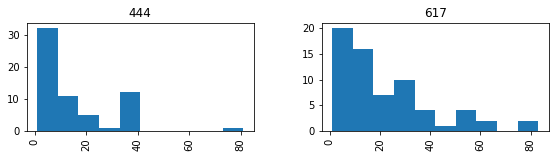

In [14]:
# Histogram of the 2 diagnosis chosen
DPC['crime01'].hist(by=DPC['diagnosis'], layout=(1,10), figsize = (50,2))
# Counts of each crime type for each diagnosis
Depression = ['617']
DepCrime = DPC[DPC['diagnosis'].isin(Depression)]
depress = DepCrime['crime01'].value_counts()

Schizo = ['444']
SchizoCrime = DPC[DPC['diagnosis'].isin(Schizo)]
schizo = SchizoCrime['crime01'].value_counts()

##### Histogram analysis
 - Alcohol addiction isn't a strong predictor for the type of diagnosis to be given. However, for most diagnosis observed, alcohol addiction can be associated with them.
 - Given that alcohol addiction is common in most criminal offence, we will focus on the next highest category for the two.
 - For schizophrenia, the next highest crimes are unlawful use of a motor vehicle and petty larcency.
 - For neurosis depression, the next highest crime is driving while intoxicated.  

In [15]:
import seaborn as sns
import matplotlib.pylab as plt

dfreq = pd.crosstab(index=DepCrime['crime01'], columns='Frequency') #Table of crime frequency for depression
dfreq

col_0,Frequency
crime01,
1,17
2,3
11,5
12,4
15,4
16,3
19,1
21,3
22,2


In [16]:
sfreq = pd.crosstab(index=SchizoCrime['crime01'], columns='Frequency') # Table of schizophrenia crime frequency
sfreq

col_0,Frequency
crime01,
1,32
11,11
22,4
23,1
32,1
33,11
36,1
81,1


#### Demographic characteristics analysis

##### Diagnosis Demographic characteristics
Since Schizophrenia is one of our topic of interests, lets find the frequencies of demographic characteristics of one or more schizophrenia diagnoses and compare it with one at random.
Questions:
 - Which demographics are most frequent in a given diagnosis?
 - Any similarities to other diagnoses with similar descriptions?

###### Schizophrenia comparisons

In [47]:
# Let's focus on schizophrenia, specifically Schizophrenic, S. Simple, and S. Paranoid.
Schizo1 = rpdata.drop(columns=['id','crime01','crime02', 'crime03','crime04','crime05','crime06','crime07','crime08','crime09','crime10',
                      'crime11','crime12','crime13','crime14','sentences'])
Dia = ['430','431', '432', '433', '434','435','436','437','438', '439', '440','441','442','443','444','445']
Schizo1 = Schizo1[Schizo1['diagnosis'].isin(Dia)]
Schizo1

,sex,birth,race,educ,marital,children,occupat,diagnosis
221,1,0,1,0,0,0,0,436
256,1,45,1,11,3,1,0,430
374,1,26,2,7,1,0,0,444
375,1,26,2,7,1,0,0,444
377,1,26,2,7,1,0,0,444
...,...,...,...,...,...,...,...,...
3200,1,45,1,12,1,0,0,436
3201,1,45,1,12,1,0,0,436
3202,1,45,1,12,1,0,0,430
3236,1,37,2,10,1,0,10,436


In [51]:
#Let's see the order of frequency of schizophrenia
n = 10
Top = Schizo1['diagnosis'].value_counts()[:n].index.tolist()
print(f"List of top diagnosis for individuals: {Top}")

List of top diagnosis for individuals: ['436', '444', '430', '438', '431', '440', '437', '442', '439', '432']


In [53]:
dia = ['436', '444', '430', '438', '431'] # Top 5 types of Schizophrenic
tops = Schizo1[Schizo1['diagnosis'].isin(dia)]

dfs = []
for col in tops.columns:
    top_values = []
    top_values = tops[col].mode()
    dfs.append(pd.DataFrame({col: top_values}).reset_index(drop=True)) #Takes all the most frequent value of the dataset and puts it in a list.
FreqS = pd.concat(dfs, axis=1)
print(FreqS)

   sex  birth race  educ marital  children occupat diagnosis
0    1      0    2    12       1         0       0       436


In [ ]:
# Let's compare to Borderline Schizophrenic.


##### Table Analysis
Does age factor in the crime of alcohol addiction? I hypothesize that we will get a bell shape figure when we compare age and frequency of alcohol addiction.

In [81]:
crime = [1]
crime1 = crime1[crime1["crime01"].isin(crime)]
crime1

,id,sex,birth,race,educ,marital,children,occupat,crime01
0,1,1,18,1,10,4,1,0,1
1,1,1,18,1,10,4,1,0,1
2,1,1,18,1,10,4,1,0,1
3,1,1,18,1,10,4,1,0,1
4,1,1,18,1,10,4,1,0,1
...,...,...,...,...,...,...,...,...,...
3233,379,1,51,2,9,1,0,10,1
3234,379,1,51,2,9,1,0,10,1
3235,380,1,37,2,10,1,0,10,1
3236,380,1,37,2,10,1,0,10,1


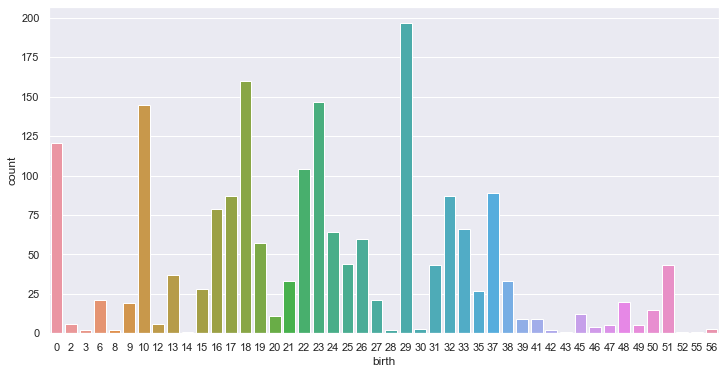

In [96]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,6)})
crime1 = crime1.sort_values(by="birth",ascending=True)
ax = sns.countplot(x="birth",data=crime1)

#### Histogram analysis
 - The graph below didn't quite follow the hypothesis I made earlier, but we see that those who are 29 were the most common to obtain an alcohol addiction in for their first time.

KeyError: 'ax'

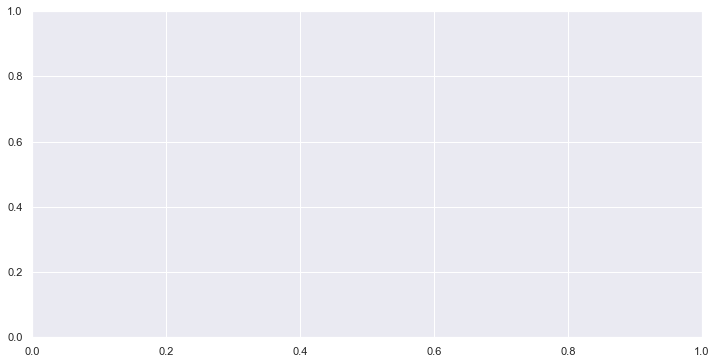

### Problems
Problems I need to solve are:
 - How do I compare two demographic characteristics at the same time? Solved: We don't need to compare two demographic characteristics as the data is enough. Instead, we know there are multiple diagnoses with the same general diagnosis/meaning, so let's find the highest demographic characteristics of a diagnosis, find a similar diagnosis, and see if we can predict which demographic characteristics to expect.
  - Do I need to turn certain values into numeric values? Solved: Not necessary.
 - How can I compare two diagnosis and how do I graph these? Solved: These are categorical variables, so there is no way of properly graphing this into line plots like I wanted to. This omits the next question as well.
 - How do I create a regression line or a best line of fit? Solved: Not necessary.
 - How do I split up the data to be able to observe the different sentences given since people received more than one sentences? Solved: Use groupby to subset the data, multiple different ways instead of dropping the information.